# Basic Computations in CuPy-Xarray

**Negin Sobhani**, **Deepak Cherian**, and **Max Jones**  
negins@ucar.edu, dcherian@ucar.edu, and max@carbonplan.org

------------

## Overview
### In this tutorial, you learn:

* Applying basic arithmetic and NumPy functions to xarray DataArrays with CuPy.
* Perform operations across multiple datasets
* Understand two important concepts: broadcasting and alignment.
* Performance of Xarray using Cupy vs. Numpy on different array sizes. 

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Familiarity with NumPy](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |
| [Basics of Cupy](Notebook0_Introduction) | Necessary | |
| [Familiarity with Xarray](https://foundations.projectpythia.org/core/xarray.html) | Necessary | |

- **Time to learn**: 40 minutes


## Introduction 

In this notebook, we will explore the procedure of conducting scientific computations using Xarray objects that wrap Cupy Arrays. 

First, let's import our packages



In [1]:
## Import NumPy and CuPy
import cupy as cp
import numpy as np
import xarray as xr
import cupy_xarray # Adds .cupy to Xarray objects

### Creating Xarray DataArray with CuPy

In the previous tutorial, we learned how to create a DataArray that wraps a CuPy array:

In [2]:
arr_gpu = cp.random.rand(10, 10)

In [3]:
da_cp = xr.DataArray(arr_gpu, dims=['x', 'y'])

da_cp

<xarray.DataArray (x: 10, y: 10)>
array([[0.64440645, 0.62072123, 0.75168547, 0.41128605, 0.88459028,
        0.47016308, 0.86304331, 0.92990986, 0.0041129 , 0.4666957 ],
       [0.56647797, 0.11373418, 0.62628122, 0.78959584, 0.36494045,
        0.13310425, 0.73672578, 0.86921365, 0.05596426, 0.55426342],
       [0.4720759 , 0.6481852 , 0.46598961, 0.93751977, 0.97099829,
        0.94932666, 0.54603983, 0.29783205, 0.36190421, 0.44288443],
       [0.62394009, 0.14474529, 0.36714822, 0.30050983, 0.44310121,
        0.45300226, 0.84836414, 0.41480516, 0.15972742, 0.30865762],
       [0.17974085, 0.43178982, 0.68688623, 0.2870211 , 0.94622374,
        0.05305575, 0.10551911, 0.50202377, 0.32414185, 0.52343633],
       [0.57433335, 0.55480641, 0.65053659, 0.84821379, 0.86448478,
        0.4614566 , 0.41249327, 0.04641715, 0.9086778 , 0.55099052],
       [0.99359918, 0.19577754, 0.42470934, 0.20198499, 0.49022272,
        0.56950438, 0.55683842, 0.81856686, 0.97131091, 0.73117734],
       [0.05195378, 0.09355582, 0.23061675, 0.48168679, 0.20765511,
        0.44548051, 0.54251798, 0.63568233, 0.61946882, 0.48324004],
       [0.89803925, 0.89935711, 0.57733868, 0.21010146, 0.15491007,
        0.27044434, 0.14652858, 0.35991027, 0.87969536, 0.57918609],
       [0.31083571, 0.29447116, 0.06544057, 0.46585981, 0.0189647 ,
        0.08291839, 0.16705158, 0.53118993, 0.99264236, 0.75636455]])
Dimensions without coordinates: x, y

In [4]:
# Move data to host
da_np = da_cp.as_numpy()
da_np


<xarray.DataArray (x: 10, y: 10)>
array([[0.64440645, 0.62072123, 0.75168547, 0.41128605, 0.88459028,
        0.47016308, 0.86304331, 0.92990986, 0.0041129 , 0.4666957 ],
       [0.56647797, 0.11373418, 0.62628122, 0.78959584, 0.36494045,
        0.13310425, 0.73672578, 0.86921365, 0.05596426, 0.55426342],
       [0.4720759 , 0.6481852 , 0.46598961, 0.93751977, 0.97099829,
        0.94932666, 0.54603983, 0.29783205, 0.36190421, 0.44288443],
       [0.62394009, 0.14474529, 0.36714822, 0.30050983, 0.44310121,
        0.45300226, 0.84836414, 0.41480516, 0.15972742, 0.30865762],
       [0.17974085, 0.43178982, 0.68688623, 0.2870211 , 0.94622374,
        0.05305575, 0.10551911, 0.50202377, 0.32414185, 0.52343633],
       [0.57433335, 0.55480641, 0.65053659, 0.84821379, 0.86448478,
        0.4614566 , 0.41249327, 0.04641715, 0.9086778 , 0.55099052],
       [0.99359918, 0.19577754, 0.42470934, 0.20198499, 0.49022272,
        0.56950438, 0.55683842, 0.81856686, 0.97131091, 0.73117734],
       [0.05195378, 0.09355582, 0.23061675, 0.48168679, 0.20765511,
        0.44548051, 0.54251798, 0.63568233, 0.61946882, 0.48324004],
       [0.89803925, 0.89935711, 0.57733868, 0.21010146, 0.15491007,
        0.27044434, 0.14652858, 0.35991027, 0.87969536, 0.57918609],
       [0.31083571, 0.29447116, 0.06544057, 0.46585981, 0.0189647 ,
        0.08291839, 0.16705158, 0.53118993, 0.99264236, 0.75636455]])
Dimensions without coordinates: x, y

Let’s confirm this isn’t a CuPy array anymore:

In [5]:
da_np.cupy.is_cupy

False

## Basic Operations with Xarray and CuPy

###  Basic Arithmetic

Xarray data arrays and datasets are compatible with arithmetic operators and numpy array functions, making it easy to work with arithmetic operators.


Once we have created a DataArray using CuPy, we can perform various operations on it using the familiar Xarray syntax. For example:

In [6]:
result_cp = da_cp*2 + 200
print (type(result_cp.data))

<class 'cupy.ndarray'>


In [7]:
result_np = da_np*2 + 200
print (type(result_np.data))

<class 'numpy.ndarray'>


### Statistics

We can use similar statistical functions as the NumPy equivalants here. For a complete list of statistical functions, please visit [the API reference](https://docs.cupy.dev/en/v8.6.0/reference/statistics.html).

In [8]:
%%time
# calculate the mean along the x dimension
mean_cp = da_cp.mean(dim='x')

CPU times: user 1.24 ms, sys: 98 µs, total: 1.34 ms
Wall time: 1.35 ms


In [9]:
print (type(mean_cp.data))

<class 'cupy.ndarray'>


In [10]:
%%time
# calculate the mean along the x dimension
mean_np = da_np.mean(dim='x')

CPU times: user 191 µs, sys: 75 µs, total: 266 µs
Wall time: 270 µs


In [11]:
print (type(mean_np.data))

<class 'numpy.ndarray'>


In [12]:
%%time 
# calculate the standard deviation along the x and y dimensions
std_cp = da_cp.std(dim=['x', 'y'])

CPU times: user 2.22 ms, sys: 909 µs, total: 3.12 ms
Wall time: 3.15 ms


In [13]:
print (type(std_cp.data))

<class 'cupy.ndarray'>


In [14]:
%%time 
# calculate the standard deviation along the x and y dimensions
std_np = da_np.std(dim=['x', 'y'])

CPU times: user 215 µs, sys: 85 µs, total: 300 µs
Wall time: 304 µs


In [15]:
print (type(std_cp.data))

<class 'cupy.ndarray'>


In [16]:
%%time 
# calculate the median along the x dimension
med_cp = da_cp.median(dim=['x'])
type(med_cp.data)

CPU times: user 3.85 ms, sys: 942 µs, total: 4.79 ms
Wall time: 4.83 ms


cupy.ndarray

In [17]:
%%time 
# calculate the median along the x dimension
med_np = da_np.median(dim=['x'])
type(med_np.data)

CPU times: user 113 µs, sys: 44 µs, total: 157 µs
Wall time: 160 µs


numpy.ndarray

Similarly we use statical functions to find order statistics:


In [18]:
%%time
# calculate the minimum along all dimensions
min_cp = da_cp.min()
type(min_cp.data)

CPU times: user 2.24 ms, sys: 94 µs, total: 2.33 ms
Wall time: 2.33 ms


cupy.ndarray

In [19]:
%%time
# calculate the minimum along all dimensions
min_np = da_np.min()
type(min_np.data)

CPU times: user 104 µs, sys: 0 ns, total: 104 µs
Wall time: 106 µs


numpy.ndarray

<div class="alert alert-block alert-success">
<b> NOTE: Most Xarray operations preserve array type. </b>
</div>


### Universal Functions (`ufunc`)

Universal functions (or `ufunc` for short) are functions that operate element-wise on ndarrays, meaning they can perform computations on each element of an array without the need for explicit looping. 

These functions are designed to handle vectorized operations, which can significantly improve the performance and readability of your code.

NumPy's universal functions offer a wide range of mathematical operations, including trigonometric functions (sin, cos, tan), exponential functions (exp, log), comparison operations (greater than, less than), and many others. We can apply these functions to the Xarray DataArray that wraps CuPy arrays:

In [20]:
%%time
# calculate the element-wise trigonometric sine
sin_cp = np.sin(da_cp)
type(sin_cp.data)

CPU times: user 1.14 ms, sys: 54 µs, total: 1.19 ms
Wall time: 1.2 ms


cupy.ndarray

In [21]:
%%time
round_cp = np.round(da_cp.mean(), 2)
type (round_cp.data)

CPU times: user 846 µs, sys: 938 µs, total: 1.78 ms
Wall time: 1.79 ms


cupy.ndarray

## Computing with Multiple Objects

### Alignment 

Alignment in xarray refers to the process of automatically aligning multiple DataArrays or Datasets based on their coordinates. Alignment ensures that the data along these coordinates is properly aligned before performing operations or calculations. This alignment is crucial because it enables xarray to handle operations on arrays with different sizes, shapes, and dimensions.



<img src="https://tutorial.xarray.dev/_images/alignment_schematic.png" width="1000">

In [22]:
arr1_gpu = xr.DataArray(
    cp.arange(12).reshape(3, 4),
    dims=("space", "time"),
    coords={"space": ["a", "b", "c"], "time": [0, 1, 2, 3]},
)
arr1_gpu

<xarray.DataArray (space: 3, time: 4)>
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Coordinates:
  * space    (space) <U1 'a' 'b' 'c'
  * time     (time) int64 0 1 2 3

In [23]:
arr2_gpu = xr.DataArray(
    cp.arange(14).reshape(2, 7),
    dims=("space", "time"),
    coords={"space": ["b", "d"], "time": [-2, -1, 0, 1, 2, 3, 4]},
)
arr2_gpu

<xarray.DataArray (space: 2, time: 7)>
array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13]])
Coordinates:
  * space    (space) <U1 'b' 'd'
  * time     (time) int64 -2 -1 0 1 2 3 4

`arr1_gpu` and `arr2_gpu` have the same dimensions (space, time) but have values at different locations in the (space, time) plane with some locations in common. It preserve array types. So for example when using CuPy arrays, it preserve the types:

In [24]:
aligned = xr.align(arr1_gpu, arr2_gpu)
[a.cupy.is_cupy for a in aligned]

[True, True]

Similar to NumPy arrays, we can also explicitly control aligning the objects. 
Xarray offers five methods to convert the coordinate labels of multiple Datasets into a shared grid:

* Using join="inner" or reindexing to the intersection set of coordinate labels.
* Using join="outer" or reindexing to the union set of coordinate labels.
* Using join="left" or reindexing to the coordinate labels of the leftmost object.
* Using join="right" or reindexing to the coordinate labels of the rightmost object.
* Using join="exact" to ensure exact equality of coordinate labels before the operation.

Xarray’s default for arithmetic operations is `join="inner"`. This can be set explicitly using `xr.set_options` context manager.

To learn more about `xarray.align` , you can check [the user guide](https://docs.xarray.dev/en/stable/generated/xarray.align.html).


### Broadcasting: adjusting arrays to the same shape

Broadcasting in Xarray refers to the automatic alignment and expansion of arrays to perform operations on arrays with different shapes and dimensions. It is a powerful feature that allows for efficient and convenient computations in Xarray. Broadcasting basically allows an operator or a function to act on two or more arrays to operate even if these arrays do not have the same shape. Xarray does broadcasting by dimension name, rather than array shape.

<img src="https://tutorial.xarray.dev/_images/broadcasting_schematic.png" width="1000">

Xarray broadcasting work similarly with CuPy and it preserves the data type. Here's an example to illustrate this:

In [25]:
gpu_arr1 = xr.DataArray(
    cp.arange(3),
    dims="space",
    coords={"space": ["a", "b", "c"]},
)
gpu_arr1

<xarray.DataArray (space: 3)>
array([0, 1, 2])
Coordinates:
  * space    (space) <U1 'a' 'b' 'c'

In [26]:
gpu_arr2 = xr.DataArray(
    cp.arange(4),
    dims="time",
    coords={"time": [0, 1, 2, 3]},
)

gpu_arr2

<xarray.DataArray (time: 4)>
array([0, 1, 2, 3])
Coordinates:
  * time     (time) int64 0 1 2 3

We can explicitly broadcast any number of arrays against each other using `xr.broadcast`:

In [27]:
arr1_broadcasted, arr2_broadcasted = xr.broadcast(gpu_arr1, gpu_arr2)


In [28]:
arr1_broadcasted

<xarray.DataArray (space: 3, time: 4)>
array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])
Coordinates:
  * space    (space) <U1 'a' 'b' 'c'
  * time     (time) int64 0 1 2 3

In [29]:
arr2_broadcasted

<xarray.DataArray (space: 3, time: 4)>
array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])
Coordinates:
  * time     (time) int64 0 1 2 3
  * space    (space) <U1 'a' 'b' 'c'

Broadcasting in xarray simplifies the process of working with arrays of different shapes, as it automatically handles the alignment and expansion required for performing computations. It reduces the need for manual reshaping or padding of arrays, making the code more concise and readable. When doing certain computations on two arrays (additions), Xarray automatically broadcast the arrays to match the dimension shapes.  To learn more about `xarray.align` , you can check [the user guide](https://docs.xarray.dev/en/stable/generated/xarray.broadcast.html).

<div class="alert alert-warning"><b>NOTE: </b>

If you encounter additional NaN values or missing data points after performing computations in xarray, it indicates that the coordinates of your xarray were not precisely aligned.





## Comparing Performance: CuPy with Xarray vs NumPy with Xarray

To compare the performance of using CuPy with Xarray to using NumPy with Xarray, let's perform a test with both libraries. In the test below we calculate relative humidity from temperature and dew point temperature:

In [30]:
import time
sizes = [100, 1000, 5000, 10000]
np_times= []
cp_times= []

speedups = []

for n in sizes:
    print("n =", n)
    temp_data = np.random.rand(n, n)
    
    temp_cpu = xr.DataArray(temp_data, dims=['lat', 'lon'])
    temp_gpu = xr.DataArray(cp.asarray(temp_data), dims=['lat', 'lon'])
    
    dew_data = np.random.rand(n, n)
    dew_cpu = xr.DataArray(dew_data, dims=['lat', 'lon'])
    dew_gpu = xr.DataArray(cp.asarray(dew_data), dims=['lat', 'lon'])
    
    # Calculate the relative humidity using the Hydrometeorological equations
    a = 17.27
    b = 237.7
    
    start_time = time.time()
    gamma_cpu = (a * dew_cpu) / (b + dew_cpu) + np.log(temp_cpu / dew_cpu)
    rh_cpu = np.exp(gamma_cpu) * 100
    end_time = time.time()
    numpy_time = end_time - start_time
    np_times.append(numpy_time)

    start_time = time.time()
    gamma_gpu = (a * dew_gpu) / (b + dew_gpu) + np.log(temp_gpu / dew_gpu)
    rh_gpu = np.exp(gamma_gpu) * 100
    cp.cuda.Stream.null.synchronize()  # wait for GPU computation to finish
    end_time = time.time()
    cupy_time = end_time - start_time
    cp_times.append(cupy_time)
    
    speed_up = round(numpy_time / cupy_time,2)
    speedups.append(speed_up)
    print("Xarray DataArrays using CuPy provides a", speed_up, "x speedup over NumPy.\n")

n = 100
Xarray DataArrays using CuPy provides a 0.11 x speedup over NumPy.

n = 1000
Xarray DataArrays using CuPy provides a 2.31 x speedup over NumPy.

n = 5000
Xarray DataArrays using CuPy provides a 95.22 x speedup over NumPy.

n = 10000
Xarray DataArrays using CuPy provides a 115.31 x speedup over NumPy.



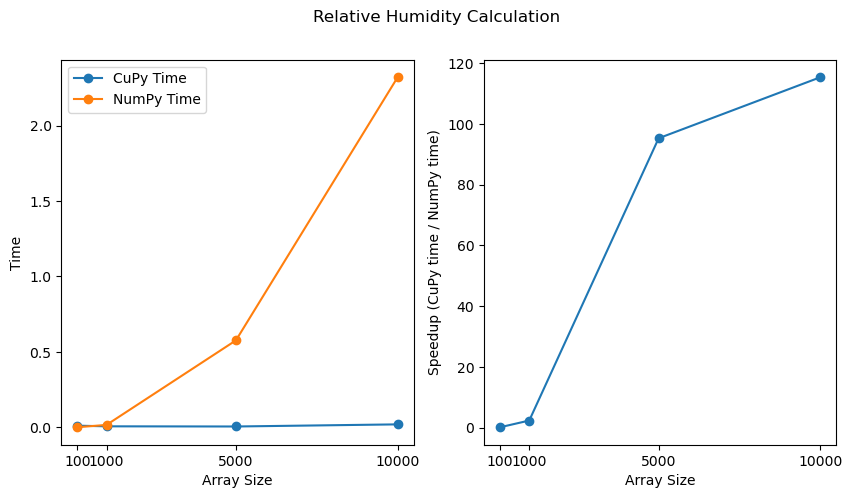

In [33]:
import matplotlib.pyplot as plt

# Creating figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot 1 : CuPy time and NumPy time
ax1.plot(sizes, cp_times, marker='o', label='CuPy Time')
ax1.plot(sizes, np_times, marker='o', label='NumPy Time')
ax1.set_xlabel('Array Size')
ax1.set_ylabel('Time')
ax1.set_xticks(sizes) 
ax1.legend()

# Plot 2 : Speedup
ax2.plot(sizes, speedups, marker='o')
ax2.set_xlabel('Array Size')
ax2.set_ylabel('Speedup (CuPy time / NumPy time)')
ax2.set_xticks(sizes) 
fig.suptitle('Relative Humidity Calculation')

plt.show()

The plots above clearly illustrate that as the size of the data increases, the performance improvement offered by CuPy becomes increasingly significant.

Congratulations! You have now uncovered the basic operations and capabilities of CuPy. 

## Summary

In this notebook, we have learned about:
    
* Applying basic arithmetic and NumPy functions to xarray DataArrays with CuPy.
* Perform operations across multiple datasets
* Understand two important concepts: broadcasting and alignment.
* Performance of Cupy vs. Numpy on different array sizes. 

## Additional Resources

[CuPy User Guide](https://docs.cupy.dev/en/stable/user_guide/index.html)  
[Xarray User Guide](https://docs.xarray.dev/en/stable/user-guide/index.html)  
[Cupy-Xarray Github](https://github.com/xarray-contrib/cupy-xarray.git)  